## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from ipyleaflet import Map, basemaps, CircleMarker

# this CSV file contains semicolons instead of comas as separator

# Constructing relative path to the CSV file
file_path = '../data/raw/real_estate.csv'

# Loading CSV file using pandas read_csv
ds = pd.read_csv(file_path, sep=';')

In [122]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

##### Observing data

In [123]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [124]:
ds.describe()

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


In [125]:
ds.head(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


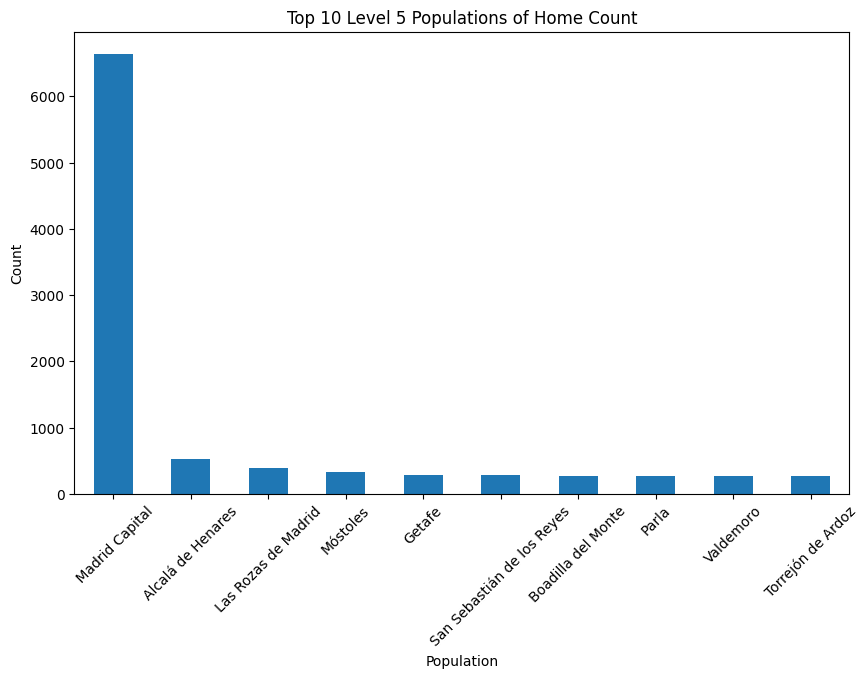

In [174]:
house_counts = ds['level5'].value_counts()
# Top 10 population of homes count
top_n = 10 

top_populations = population_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_populations.plot(kind='bar')
plt.title(f'Top {top_n} Populations of Home Count')
plt.xlabel('Population')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

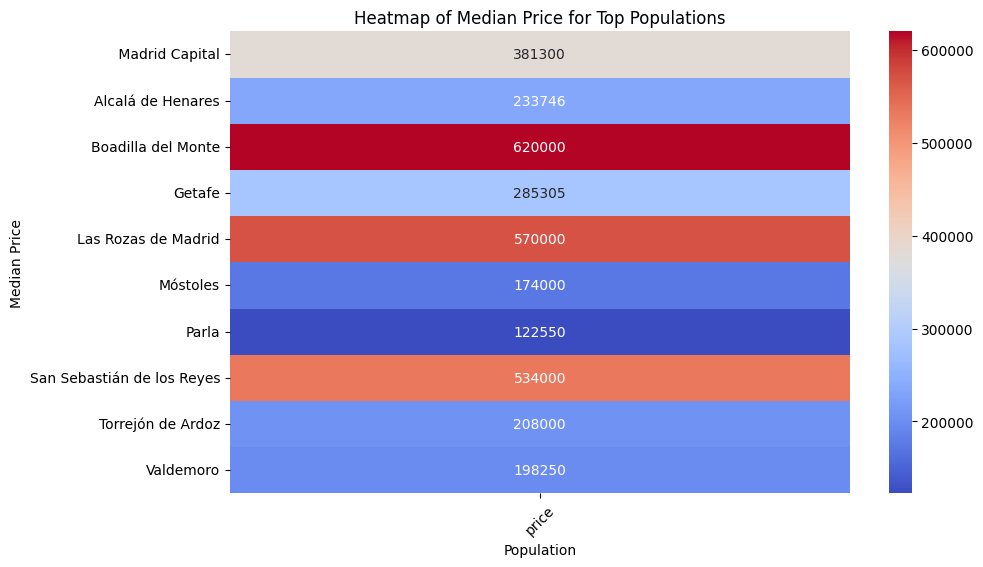

In [176]:
top_n = 10  # Top 10 populations
top_populations = ds['level5'].value_counts().head(top_n).index
subset = ds[ds['level5'].isin(top_populations)]

# Pivot table to calculate the median price for each population
pivot_table = subset.pivot_table(index='level5', values='price', aggfunc='median')

# Heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap of Median Price for Top Populations')
plt.xlabel('Population')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

#### What is the most expensive home in the dataset? (★☆☆)

In [126]:
# Convert 'price' column to numeric, ignoring non-numeric values
ds['price'] = pd.to_numeric(ds['price'], errors='coerce')

# Drop rows with NaN values in the 'price' column
ds = ds.dropna(subset=['price'])

# Find the index of the most expensive home
most_expensive_index = ds['price'].idxmax()

# Get the details of the most expensive home using the index
most_expensive_home = ds.loc[most_expensive_index]

# Display the details of the most expensive home
print("Most Expensive Home:")
print("Real Estate Agency:", most_expensive_home['realEstate_name'])
print("Price:", most_expensive_home['price'])
print("Location City:", most_expensive_home['level2'])
print("Location Zone:", most_expensive_home['level3'])
print("Location Zone of:", most_expensive_home['level4'])
print("# of bedrooms:", most_expensive_home['rooms'])
print("# of bathrooms:", most_expensive_home['bathrooms'])
print("Surface area:", most_expensive_home['surface'])

Most Expensive Home:
Real Estate Agency: engel volkers torrelodones
Price: 8500000
Location City: Madrid
Location Zone: Zona Noroeste
Location Zone of: El Escorial, Zona de
# of bedrooms: 19.0
# of bathrooms: nan
Surface area: nan


#### What is cheapest home in the dataset? (★☆☆)

In [127]:
# Rows with price as zero
zero_price_count = (ds['price'] == 0).sum()
print("Number of Rows with Zero Prices:", zero_price_count)

Number of Rows with Zero Prices: 60


In [128]:
# Filter for rows with zero price
home_price = ds[ds['price'] != 0]

# First and second rows with the cheapest homes
cheapest = home_price[home_price['price'] == home_price['price'].min()]
second_cheapest_home = home_price.nsmallest(2, 'price').iloc[-1]

print("1st Cheapest Home:")
print("Real Estate Agency:", cheapest['realEstate_name'].values[0])
print("Price:", cheapest['price'].values[0])
print("Location City:", cheapest['level2'].values[0])
print("Location Zone:", cheapest['level3'].values[0])
print("Location Zone of:", cheapest['level4'].values[0])
print("# of bedrooms:", cheapest['rooms'].values[0])
print("# of bathrooms:", cheapest['bathrooms'].values[0])
print("Surface area:", cheapest['surface'].values[0])


print(" ")
print("2nd Cheapest Home:")
print("Real Estate Agency:", second_cheapest_home['realEstate_name'])
print("Price:", second_cheapest_home['price'])
print("Location City:", second_cheapest_home['level2'])
print("Location Zone:", second_cheapest_home['level3'])
print("Location Zone of:", second_cheapest_home['level4'])
print("# of bedrooms:", second_cheapest_home['rooms'])
print("# of bathrooms:", second_cheapest_home['bathrooms'])
print("Surface area:", second_cheapest_home['surface'])

1st Cheapest Home:
Real Estate Agency: redpiso coslada
Price: 600
Location City: Madrid
Location Zone: Corredor del Henares
Location Zone of: Coslada, Zona de
# of bedrooms: 3.0
# of bathrooms: 1.0
Surface area: 80.0
 
2nd Cheapest Home:
Real Estate Agency: haya real estate
Price: 16200
Location City: Madrid
Location Zone: Corredor del Henares
Location Zone of: Los Santos, Zona de
# of bedrooms: 1.0
# of bathrooms: 1.0
Surface area: 68.0


##### What are the 5 cheapest homes?

In [129]:
cheapest_homes = home_price.nsmallest(5, 'price')
pd.DataFrame(cheapest_homes)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
7491,7492,153977752,False,redpiso coslada,910759552.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,80.0,600,2019-12-24T12:56:00Z,"REDPISO COSLADA alquila vivienda en Ciudad 70,...","Berlin, Coslada",España,Madrid,Madrid,Corredor del Henares,"Coslada, Zona de",Coslada,NaN,Ciudad 70,NaN,Ciudad 70,0,0,0,0,0,0,0,0,0,0,"40,41869","-3,54004",NaN,NaN
12233,12234,152327984,False,haya real estate,911228034.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,68.0,16200,2019-12-20T05:31:00Z,Vivienda unifamiliar adosada de 68 metros cuad...,"Mayor, Los Santos de la Humosa",España,Madrid,Madrid,Corredor del Henares,"Los Santos, Zona de",Los Santos de la Humosa,NaN,NaN,NaN,Los Santos de la Humosa,0,0,0,0,0,0,0,0,0,0,"40,50220687","-3,25763694",NaN,NaN
15099,15100,151611787,False,haya real estate,911227078.0,https://www.fotocasa.es/es/comprar/vivienda/ta...,1.0,1.0,68.0,16200,2019-12-18T02:45:00Z,Vivienda unifamiliar adosada de 68 metros cuad...,"Mayor, Los Santos de la Humosa",España,Madrid,Madrid,Corredor del Henares,"Los Santos, Zona de",Los Santos de la Humosa,NaN,NaN,NaN,Los Santos de la Humosa,0,0,0,0,0,0,0,0,0,0,"40,50220687","-3,25763694",NaN,NaN
10201,10202,150442392,False,hola pisos,935432140.0,https://www.fotocasa.es/vivienda/navalcarnero/...,NaN,NaN,128.0,20000,2019-12-22T05:20:00Z,"Casa a reformar en venta en Ambite, Madrid. Di...",Ambite,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Perales de Tajuña, Zona de",Ambite,NaN,NaN,NaN,Ambite,0,0,0,0,0,0,0,0,0,0,"40,32772","-3,18138",NaN,NaN
12628,12629,153410449,False,outletdeviviendas,912172269.0,https://www.fotocasa.es/es/comprar/vivienda/mi...,NaN,NaN,NaN,20000,2019-12-19T20:00:00Z,1 suelo rústico de 32500 m2. Uso mayoritario r...,Cenicientos,España,Madrid,Madrid,Zona Suroeste,Resto A5,Cenicientos,NaN,NaN,NaN,Cenicientos,0,0,0,0,0,0,0,0,0,0,"40,262627","-4,464905",NaN,NaN


##### Keep in mind results show dataset contains duplicate homes with same real estate agency but with different phone numbers.

#### What is the biggest and the smallest home in the dataset? (★☆☆)

Cleaning Data:

In [130]:
nan_count_surface = ds['surface'].isna().sum()
print("Number of NaN values in the 'surface' column:", nan_count_surface)

Number of NaN values in the 'surface' column: 1250


In [131]:
# Dropping NaNs from surface col
ds_clean = ds.dropna(subset=['surface'])

In [132]:
zero_surface_count = (ds_clean['surface'] == 0).sum()
print("Number of zero values in the 'surface' column:", zero_surface_count)

Number of zero values in the 'surface' column: 0


##### Biggest home

In [133]:
# Sort the surface column in descending order
ds_surface_sorted = ds_clean.sort_values(by='surface')

# Filter row with the largest surface area
biggest_home = ds_surface_sorted.iloc[-1]

# Filter row with the smallest surface area
smallest_home = ds_surface_sorted.iloc[0]

print("Details of surface area of biggest home:")
print("Real Estate Agency:", biggest_home['realEstate_name'])
print("Surface area:", biggest_home['surface'])
print("Price:", biggest_home['price'])
print("Location City:", biggest_home['level2'])
print("Location Zone:", biggest_home['level3'])
print("Location Zone of:", biggest_home['level4'])
print("# of bedrooms:", biggest_home['rooms'])
print("# of bathrooms:", biggest_home['bathrooms'])


Details of surface area of biggest home:
Real Estate Agency: habitarium inmobiliaria
Surface area: 249000.0
Price: 289000
Location City: Madrid
Location Zone: Zona Suroeste
Location Zone of: Sevilla la Nueva, Zona de
# of bedrooms: 3.0
# of bathrooms: 2.0


##### Top 5 biggest homes

In [134]:
largest_surface_homes = ds_surface_sorted.nlargest(5, 'surface')
pd.DataFrame(largest_surface_homes)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
6794,6795,153936192,False,habitarium inmobiliaria,916357732.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,249000.0,289000,2019-12-25T18:30:00Z,Zona Centro. Chalet pareado de esquina de 249m...,Sevilla la Nueva,España,Madrid,Madrid,Zona Suroeste,"Sevilla la Nueva, Zona de",Sevilla la Nueva,NaN,NaN,NaN,Sevilla la Nueva,0,0,0,0,0,0,0,0,0,0,"40,34633","-4,02174",NaN,NaN
12676,12677,153942565,False,montse,NaN,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,3.0,66666.0,389000,2019-12-19T19:00:00Z,NaN,"Calle Apd 4 Los Carrizos, 357, Arroyomolinos (...",España,Madrid,Madrid,Zona Suroeste,"Arroyomolinos, Zona de",Arroyomolinos (Madrid),NaN,Zona Bulevar y Europa,NaN,Zona Bulevar y Europa,0,0,0,0,0,0,0,0,0,1,"40,27977","-3,92413",NaN,NaN
14852,14853,152249752,False,deplace,910750918.0,https://www.fotocasa.es/es/comprar/vivienda/la...,NaN,NaN,16853.0,90000,2019-12-18T09:41:00Z,Presentamos esta estupenda finca que se encuen...,"Calle Paraje Monte de Valdeoliva, San Agustín ...",España,Madrid,Madrid,Zona Norte de Madrid,"San Agustín de Guadalix, Zona de",San Agustín del Guadalix,NaN,NaN,NaN,San Agustín del Guadalix,0,0,0,0,0,0,0,0,0,0,"40,6912092","-3,608836",NaN,NaN
8537,8538,142907825,False,remax jumbo,910758029.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,30.0,20.0,5504.0,790000,2019-12-23T17:25:00Z,"^^^^^ESPECTACULAR FINCA DE RECREO, EN LA SIERR...",Navarredonda,España,Madrid,Madrid,Zona Norte de Madrid,"La Sierra Norte, Zona de",Navarredonda,NaN,NaN,NaN,Navarredonda,0,0,0,0,0,0,0,0,0,0,"40,98879","-3,70811",NaN,NaN
1198,1199,142601805,False,sosdivar,914890914.0,https://www.fotocasa.es/es/comprar/vivienda/la...,6.0,3.0,5083.0,825000,2019-12-28T06:34:00Z,"Lujosa vivienda de 515 m2 , muros de granito, ...","Calle Canario 2 Los Ranchos, Galapagar",España,Madrid,Madrid,Zona Noroeste,"Galapagar, Zona de",Galapagar,NaN,Puerto de Galapagar - Las Cuestas,NaN,Puerto de Galapagar - Las Cuestas,0,0,0,0,0,0,0,0,0,1,"40,55249","-3,98827",NaN,NaN


##### Smallest home

In [135]:
print("Details of surface area of smallest home:")
print("Real Estate Agency:", smallest_home['realEstate_name'])
print("Surface area:", smallest_home['surface'])
print("Price:", smallest_home['price'])
print("Location City:", smallest_home['level2'])
print("Location Zone:", smallest_home['level3'])
print("Location Zone of:", smallest_home['level4'])
print("# of bedrooms:", smallest_home['rooms'])
print("# of bathrooms:", smallest_home['bathrooms'])

Details of surface area of smallest home:
Real Estate Agency: toledo21
Surface area: 15.0
Price: 85000
Location City: Madrid
Location Zone: Madrid, Zona de
Location Zone of: nan
# of bedrooms: 1.0
# of bathrooms: 1.0


##### Top 5 smallest homes

In [136]:
smallest_surface_homes = ds_surface_sorted.nsmallest(5, 'surface')
pd.DataFrame(smallest_surface_homes)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
498,499,152817874,False,toledo21,910757382.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,15.0,85000,2019-12-28T19:04:44.6433814Z,"¡NO BUSQUES MÁS, YA LA HAS ENCONTRADO! . \n \n...","Calle Amparo, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Centro,Embajadores - Lavapiés,Embajadores - Lavapiés,0,0,0,0,0,0,0,0,0,0,"40,40818","-3,70192",NaN,NaN
14361,14362,153920125,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/al...,NaN,1.0,18.0,89000,2019-12-18T17:11:00Z,¡ OPORTUNIDAD ÚNICA! \n ¡IDEAL PARA INVERTIR! ...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Centro,Embajadores - Lavapiés,Embajadores - Lavapiés,0,0,0,0,0,0,0,0,0,0,"40,40733","-3,69876",NaN,NaN
15320,15321,153901533,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,1.0,18.0,89000,2019-12-17T18:26:00Z,¡ OPORTUNIDAD ÚNICA! \n ¡IDEAL PARA INVERTIR! ...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Centro,Embajadores - Lavapiés,Embajadores - Lavapiés,0,0,0,0,0,0,0,0,0,0,"40,40733","-3,69876",NaN,NaN
1888,1889,153989797,False,vivienda2,912188609.0,https://www.fotocasa.es/vivienda/madrid-capita...,NaN,1.0,21.0,169000,2019-12-28T03:10:00Z,Vivienda 2 pone a la venta este magnífico estu...,"Arquitectura, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Arganzuela,Acacias,Acacias,0,0,0,0,0,0,0,0,0,0,"40,4002202213562","-3,70302392135624",NaN,NaN
9682,9683,153962563,False,haya real estate,911227078.0,https://www.fotocasa.es/es/comprar/vivienda/co...,1.0,1.0,21.0,94000,2019-12-23T04:56:00Z,Miniestudio situado en el Barrio Fuente el Ber...,"Los Peñascales, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Salamanca,Fuente del Berro,Fuente del Berro,0,0,0,0,0,0,0,0,0,0,"40,42421257","-3,66674429",NaN,NaN


#### How many populations (level5) the dataset contains? (★☆☆)

In [137]:
# Get unique populations (level5)
unique_populations = ds['level5'].unique()

# Count number of unique populations
num_unique_populations = len(unique_populations)

print("Number of Unique Populations (level5):", num_unique_populations)

Number of Unique Populations (level5): 168


#### Does the dataset contain NAs? (★☆☆)


In [138]:
# Count number of missing values in the entire DataFrame
num_missing_values = ds.isna().sum().sum()

print("Number of Missing Values in the Dataset:", num_missing_values)

Number of Missing Values in the Dataset: 65690


In [139]:
# Count number of NaN values for each column
nan_counts = ds.isna().sum()

print("Number of NaN values for each column:")
print(nan_counts)

Number of NaN values for each column:
Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335


#### Delete the NAs of the dataset, if applicable (★★☆)

Deleting NAs from the dataset will result in dropping all of the rows given there are entire columns with NaNs. For this exploratory analysis, dropping certain columns with NAs would result in a loss of valuable information. There is a mix of columns that contain valueable information for any given house. It would be better to drop NaNs when doing deep analysis for specific columns. 

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [140]:
arroyomolinos_data = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

mean_price_arroyomolinos = arroyomolinos_data['price'].mean()

print("Mean Price in Arroyomolinos (Madrid):", mean_price_arroyomolinos)


Mean Price in Arroyomolinos (Madrid): 294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

In [141]:
arroyomolinos_prices = arroyomolinos_data['price']

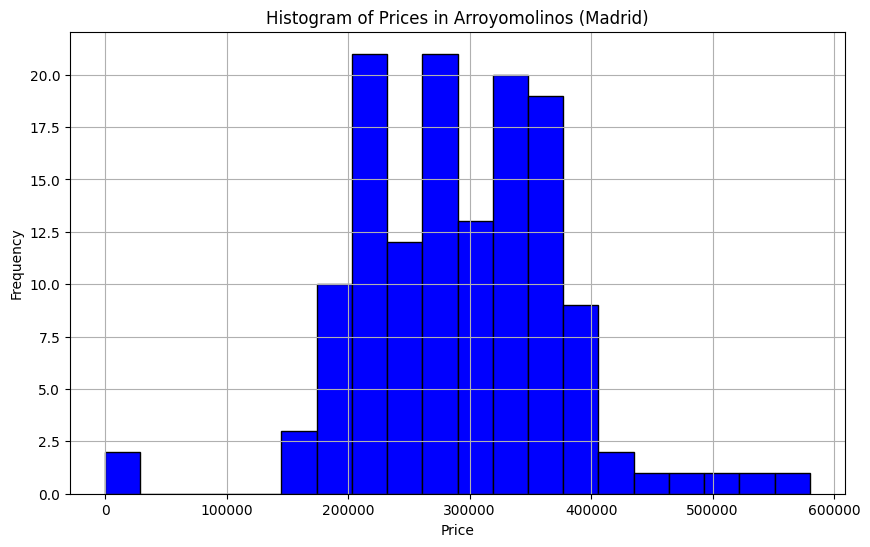

In [142]:
plt.figure(figsize=(10, 6))
plt.hist(arroyomolinos_prices, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Prices in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

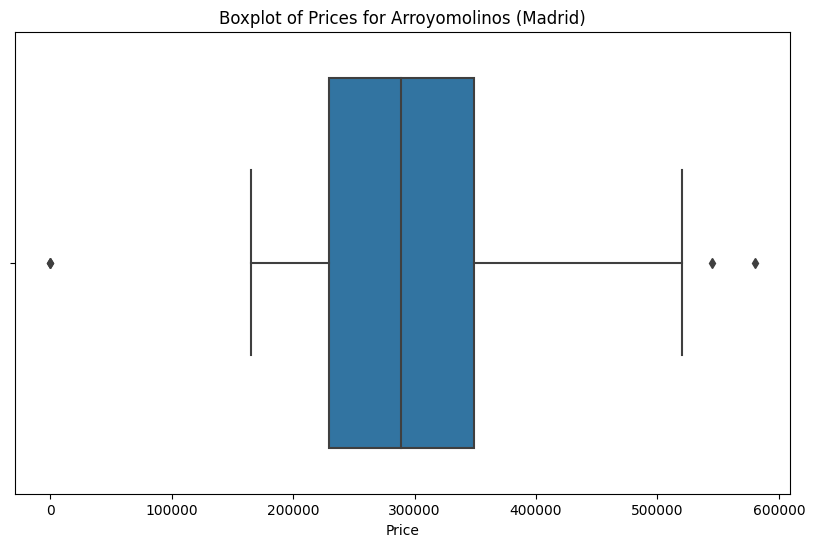

In [143]:
# Box and whisker plot of price distribution for Arroyomolinos
plt.figure(figsize=(10, 6))
sns.boxplot(x=arroyomolinos_prices)
plt.title('Boxplot of Prices for Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.show()

In [144]:
# Display descriptive statistics for the 'arroyomolinos_prices' DataFrame
print(arroyomolinos_prices.describe())

count       137.00000
mean     294541.59854
std       84183.51590
min           0.00000
25%      229900.00000
50%      289000.00000
75%      348900.00000
max      580000.00000
Name: price, dtype: float64


In [145]:
print("The median price in Arroyomolinos is", np.median(arroyomolinos_prices))

The median price in Arroyomolinos is 289000.0


The prices for homes from the Arroyomolinos (Madrid) population appears to have a positively skewed distribution where there are relatively fewer homes with higher prices that extend out to the right of the distribution. Majority of the home prices are clustered between approximately 170,000 and 400,000 euros. 

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [146]:
# List of populations to subset
populations_to_subset = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

# Create a subset based on the list of populations
south_belt_subset = ds[ds['level5'].isin(populations_to_subset)]

In [147]:
south_belt_subset.head(3)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN


In [148]:
# Count the rows for each population
population_counts = south_belt_subset['level5'].value_counts()

# Print the row count for each population
for population, count in population_counts.items():
    print(f"Population: {population}, # of houses: {count}")

Population: Getafe, # of houses: 290
Population: Fuenlabrada, # of houses: 233
Population: Leganés, # of houses: 194
Population: Alcorcón, # of houses: 190


#### Make a bar plot of the median of prices (★★★) 

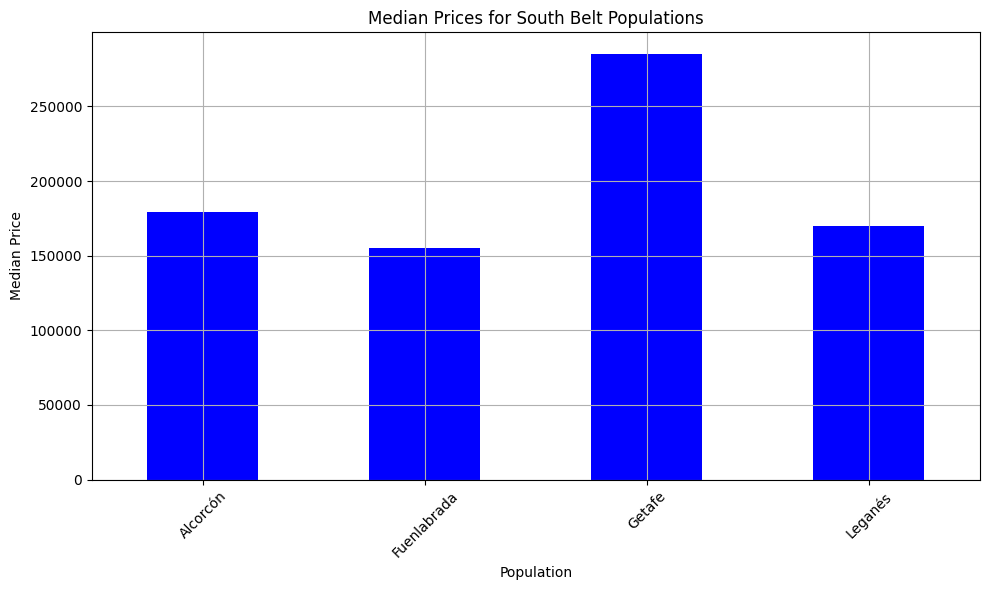

In [149]:
# Calculate the median prices for each population
median_prices = south_belt_subset.groupby('level5')['price'].median()

# Create a bar plot
plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar', color='blue')
plt.title('Median Prices for South Belt Populations')
plt.xlabel('Population')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [150]:
# Calculate the sample mean and variance for each variable in the south_belt_subset
mean_price = south_belt_subset['price'].mean()
variance_price = south_belt_subset['price'].var()

mean_rooms = south_belt_subset['rooms'].mean()
variance_rooms = south_belt_subset['rooms'].var()

mean_surface = south_belt_subset['surface'].mean()
variance_surface = south_belt_subset['surface'].var()

mean_bathrooms = south_belt_subset['bathrooms'].mean()
variance_bathrooms = south_belt_subset['bathrooms'].var()

print("Sample Mean and Variance for Price in South Belt Subset:")
print("Mean:", mean_price)
print("Variance:", variance_price)

print("\nSample Mean and Variance for Rooms in South Belt Subset:")
print("Mean:", mean_rooms)
print("Variance:", variance_rooms)

print("\nSample Mean and Variance for Surface Area in South Belt Subset:")
print("Mean:", mean_surface)
print("Variance:", variance_surface)

print("\nSample Mean and Variance for Bathrooms in South Belt Subset:")
print("Mean:", mean_bathrooms)
print("Variance:", variance_bathrooms)

Sample Mean and Variance for Price in South Belt Subset:
Mean: 223094.48070562293
Variance: 14921367508.04902

Sample Mean and Variance for Rooms in South Belt Subset:
Mean: 3.0177383592017737
Variance: 0.7188858892927542

Sample Mean and Variance for Surface Area in South Belt Subset:
Mean: 111.75222363405337
Variance: 4263.051760316337

Sample Mean and Variance for Bathrooms in South Belt Subset:
Mean: 1.633221850613155
Variance: 0.5717968625577321


In [151]:
# Calculate the sample mean and variance for the specified variables in the south_belt_subset
variable_stats = south_belt_subset[['price', 'rooms', 'surface', 'bathrooms']].describe()

print("Sample Mean and Variance for Variables in South Belt Subset:")
print(variable_stats)

Sample Mean and Variance for Variables in South Belt Subset:
              price       rooms     surface   bathrooms
count  9.070000e+02  902.000000  787.000000  897.000000
mean   2.230945e+05    3.017738  111.752224    1.633222
std    1.221530e+05    0.847871   65.292050    0.756173
min    0.000000e+00    1.000000   38.000000    1.000000
25%    1.349450e+05    3.000000   72.000000    1.000000
50%    1.750000e+05    3.000000   89.000000    1.000000
75%    3.070500e+05    3.000000  128.000000    2.000000
max    1.050000e+06    7.000000  722.000000    6.000000


#### What is the most expensive home of each population? (★★☆) 

In [152]:
# Iterate through each population and find the most expensive home
for population in populations_to_subset:
    population_data = south_belt_subset[south_belt_subset['level5'] == population]
    
    if not population_data.empty:
        most_expensive_home = population_data.loc[population_data['price'].idxmax()]
        print("Most Expensive Home in", population, ":")
        print("Price:", most_expensive_home['price'])
        print("Real Estate Name:", most_expensive_home['realEstate_name'])
        print("Rea Estate ID:", most_expensive_home['id_realEstates'])
        print("\n")
    else:
        print("No data for", population)

Most Expensive Home in Fuenlabrada :
Price: 490000
Real Estate Name: unna madrid
Rea Estate ID: 153660921


Most Expensive Home in Leganés :
Price: 650000
Real Estate Name: bafre gestion y servicios inmobiliarios
Rea Estate ID: 152251506


Most Expensive Home in Getafe :
Price: 1050000
Real Estate Name: unna grupo inmobiliario
Rea Estate ID: 151105544


Most Expensive Home in Alcorcón :
Price: 950000
Real Estate Name: 100 home red inmobiliaria
Rea Estate ID: 153275915




#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

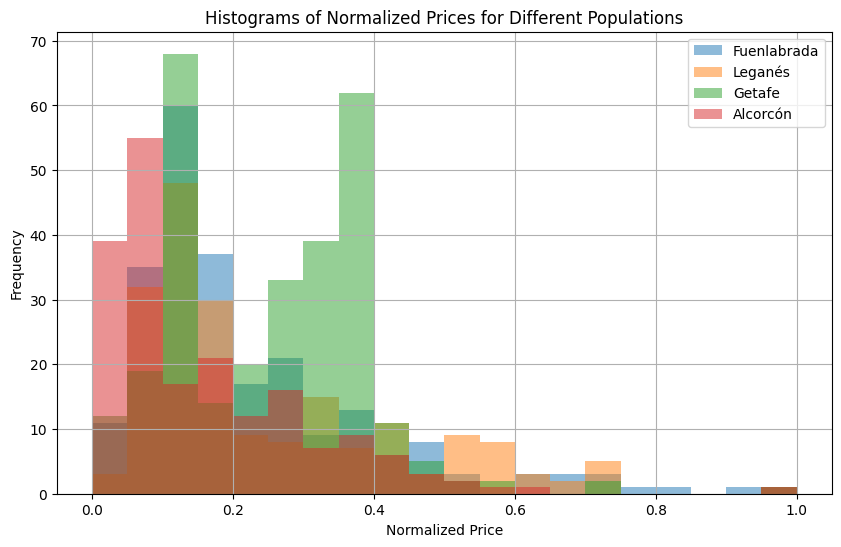

In [153]:
# Normalize the prices for each population
normalized_prices = south_belt_subset.groupby('level5')['price'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot histograms for normalized prices
plt.figure(figsize=(10, 6))
for population in populations_to_subset:
    plt.hist(normalized_prices[population], bins=20, alpha=0.5, label=population)

plt.title('Histograms of Normalized Prices for Different Populations')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [154]:
# Determining the data types for lat and long cols
print(south_belt_subset[['latitude', 'longitude']].dtypes)

latitude     object
longitude    object
dtype: object


In [155]:
# Converting objects to floats for ipyleaflet map
south_belt_subset['latitude'] = south_belt_subset['latitude'].str.replace(',', '.').astype(float)
south_belt_subset['longitude'] = south_belt_subset['longitude'].str.replace(',', '.').astype(float)

C:\Users\Rashid\AppData\Local\Temp\ipykernel_24572\1179373652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['latitude'] = south_belt_subset['latitude'].str.replace(',', '.').astype(float)
C:\Users\Rashid\AppData\Local\Temp\ipykernel_24572\1179373652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['longitude'] = south_belt_subset['longitude'].str.replace(',', '.').astype(float)


In [156]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet


# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (40.317755279476394, -3.784103393554688), zoom = 12.0, 
    basemap=basemaps.Stamen.Terrain)
    
for index, row in south_belt_subset.iterrows():
    latitude = row["latitude"]  # Convert latitude to float
    longitude = row["longitude"]  # Convert longitude to float
    marker = CircleMarker(location=(latitude, longitude), radius=7,
                          color="blue", fill_color="blue", stroke_width=-500)
    map.add_layer(marker)
map

Map(center=[40.317755279476394, -3.784103393554688], controls=(ZoomControl(options=['position', 'zoom_in_text'…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [157]:
# Filter properties for Getafe and Alcorcon
getafe_properties = ds[ds['level5'] == 'Getafe'].copy()
alcorcon_properties = ds[ds['level5'] == 'Alcorcón'].copy()

# Calculate price per square meter for each property
getafe_properties['price_per_sqm'] = getafe_properties['price'] / getafe_properties['surface']
alcorcon_properties['price_per_sqm'] = alcorcon_properties.apply(lambda row: row['price'] / row['surface'] if row['surface'] > 0 else 0, axis=1)

# Calculate average price per square meter for each town
avg_price_per_sqm_getafe = getafe_properties['price_per_sqm'].mean()
avg_price_per_sqm_alcorcon = alcorcon_properties['price_per_sqm'].mean()

# Print the results
print("Average Price per Square Meter in Getafe:", avg_price_per_sqm_getafe)
print("Average Price per Square Meter in Alcorcón:", avg_price_per_sqm_alcorcon)

# Calculate the absolute difference in average prices per square meter
price_sqm_difference = abs(avg_price_per_sqm_getafe - avg_price_per_sqm_alcorcon)


# Compare the average prices
if avg_price_per_sqm_getafe > avg_price_per_sqm_alcorcon:
    print("The average price per square meter in Getafe is higher than in Alcorcón.")
    print(f"The price difference is {price_sqm_difference:.2f} units.")

elif avg_price_per_sqm_getafe < avg_price_per_sqm_alcorcon:
    print("The average price per square meter in Alcorcón is higher than in Getafe.")
    print(f"The price difference is {price_sqm_difference:.2f} units.")

else:
    print("The average price per square meter is the same in both towns.")

Average Price per Square Meter in Getafe: 2066.314949251463
Average Price per Square Meter in Alcorcón: 2038.943837234389
The average price per square meter in Getafe is higher than in Alcorcón.
The price difference is 27.37 units.


In [158]:
num_rows_getafe = getafe_properties.shape[0]
num_rows_alcorcon = alcorcon_properties.shape[0]
print("Number of properties in Getafe subset:", num_rows_getafe)
print("Number of properties in Alcorcon subset:", num_rows_alcorcon)

Number of properties in Getafe subset: 290
Number of properties in Alcorcon subset: 190


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [159]:
valdemorillo_properties = ds[ds['level5'] == 'Valdemorillo'].copy()
galapagar_properties = ds[ds['level5'] == 'Galapagar'].copy()

avg_price_valdemorillo = valdemorillo_properties['price'].mean()
avg_price_galapagar = galapagar_properties['price'].mean()

# Print the results
print("Average Price in Valdemorillo:", avg_price_valdemorillo)
print("Average Price in Galapagar:", avg_price_galapagar)

# Calculate the absolute difference in average prices per square meter
price_difference = abs(avg_price_valdemorillo - avg_price_galapagar)


if avg_price_valdemorillo > avg_price_galapagar:
    print("The average price in Valdemorillo is higher than in Galapagar.")
    print(f"The price difference is {price_difference:.2f} units.")

elif avg_price_valdemorillo < avg_price_galapagar:
    print("The average price in Galapagar is higher than in Valdemorillo.")
    print(f"The price difference is {price_difference:.2f} euros.")

else:
    print("The average prices in Valdemorillo and Galapagar are the same.")

Average Price in Valdemorillo: 363860.2931034483
Average Price in Galapagar: 360063.20238095237
The average price in Valdemorillo is higher than in Galapagar.
The price difference is 3797.09 units.


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [160]:
# Calculate price per square meter for each property
valdemorillo_properties['price_per_sqm'] = valdemorillo_properties['price'] / valdemorillo_properties['surface']
galapagar_properties['price_per_sqm'] = galapagar_properties['price'] / galapagar_properties['surface']

# Calculate average price per square meter for each town
avg_price_per_sqm_valdemorillo = valdemorillo_properties['price_per_sqm'].mean()
avg_price_per_sqm_galapagar = galapagar_properties['price_per_sqm'].mean()

# Print the results
print("Average price per square meter in Valdemorillo:", avg_price_per_sqm_valdemorillo)
print("Average price per square meter in Galapagar:", avg_price_per_sqm_galapagar)

# Compare the average price per square meter
if avg_price_per_sqm_valdemorillo > avg_price_per_sqm_galapagar:
    print("The average price per square meter in Valdemorillo is higher than in Galapagar.")
elif avg_price_per_sqm_valdemorillo < avg_price_per_sqm_galapagar:
    print("The average price per square meter in Galapagar is higher than in Valdemorillo.")
else:
    print("The average price per square meter in Valdemorillo and Galapagar are the same.")

Average price per square meter in Valdemorillo: 1317.9502109024986
Average price per square meter in Galapagar: 1606.3240303094024
The average price per square meter in Galapagar is higher than in Valdemorillo.


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

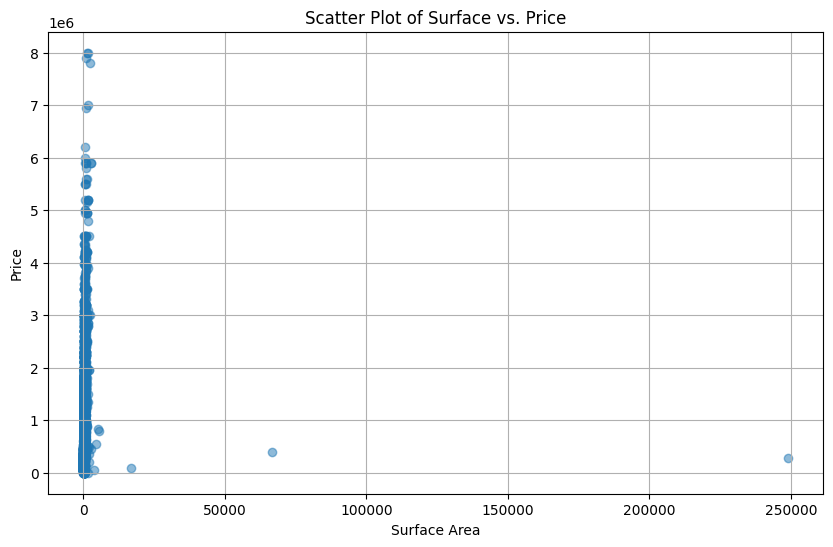

In [161]:
# Filter the data to exclude rows with missing values in 'surface' or 'price'
filtered_data = ds.dropna(subset=['surface', 'price'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['surface'], filtered_data['price'], alpha=0.5)
plt.title('Scatter Plot of Surface vs. Price')
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

There is practically no correlation between surface and price when taking into account properties for all populations in the dataset. 

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

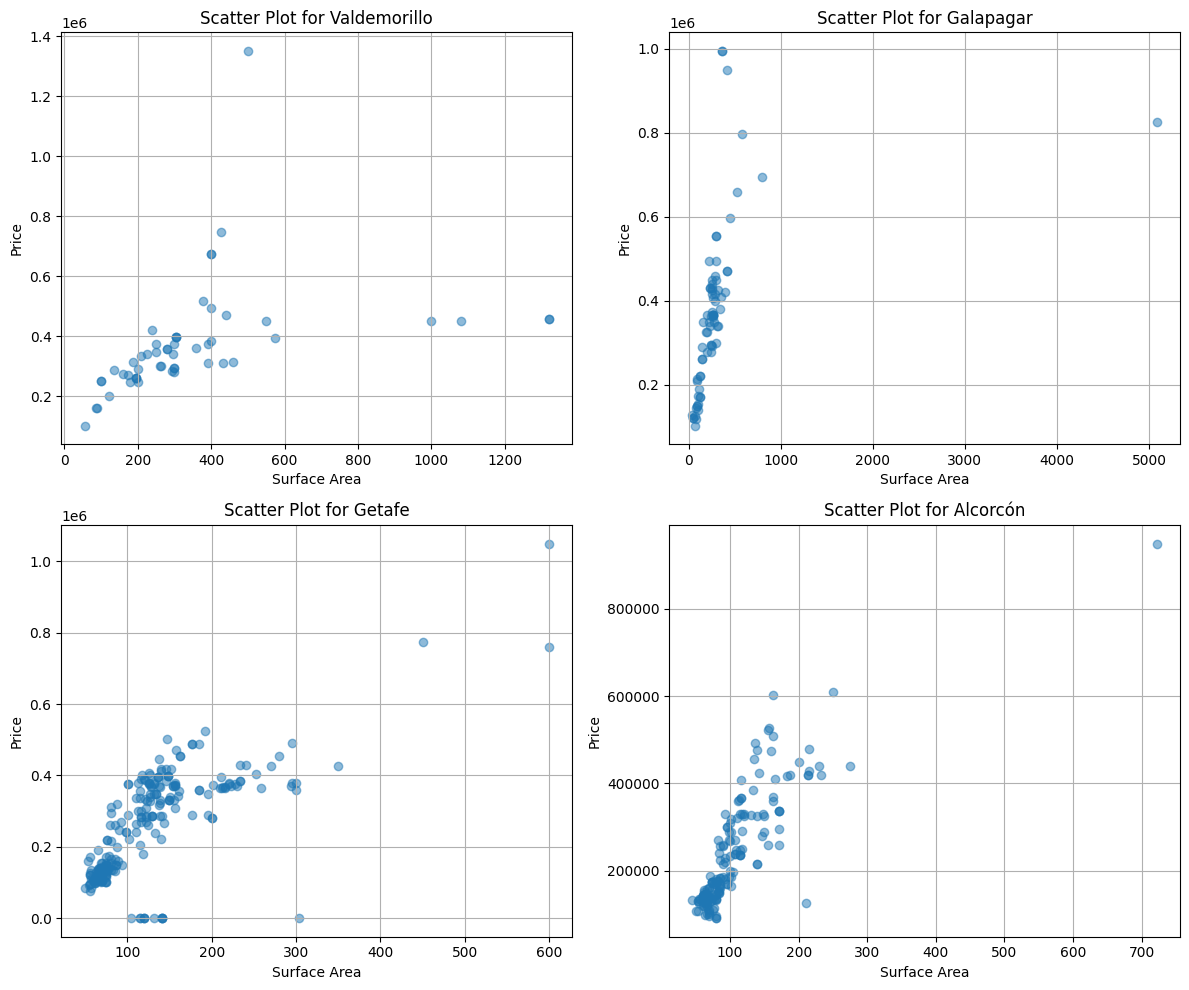

In [162]:
# List of populations to analyze
populations_to_analyze = ['Valdemorillo', 'Galapagar', 'Getafe', 'Alcorcón']

# Create subplots for each population
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, population in enumerate(populations_to_analyze):
    population_data = filtered_data[filtered_data['level5'] == population]
    axs[i].scatter(population_data['surface'], population_data['price'], alpha=0.5)
    axs[i].set_title(f'Scatter Plot for {population}')
    axs[i].set_xlabel('Surface Area')
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [163]:
# Count the number of rows for each population
population_counts = filtered_data['level5'].value_counts()

# Print the number of rows for each population in populations_to_analyze
for population in populations_to_analyze:
    num_rows = population_counts.get(population, 0)  # Get the count or default to 0 if population not found
    print(f"Number of rows for {population}: {num_rows}")

Number of rows for Valdemorillo: 53
Number of rows for Galapagar: 75
Number of rows for Getafe: 241
Number of rows for Alcorcón: 173


The scatter plots show a trend where larger surface areas tend to have higher prices andsuggests that the positive correlation between surface and price holds true across different populations. While there's a relationship between surface and price, the strength of the relationship varies across populations. 



#### How many  real estate agencies the dataset contains? (★★☆) 

In [164]:
# Calculate the number of unique real estate agencies
num_unique_agencies = ds['realEstate_name'].nunique()

print("Number of unique real estate agencies:", num_unique_agencies)

Number of unique real estate agencies: 1821


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [165]:
# Group the data by 'level5Id' and count occurrences
population_counts = ds['level5'].value_counts()

pd.options.display.max_rows = None
print(population_counts)


level5
 Madrid Capital                    6643
Alcalá de Henares                   525
Las Rozas de Madrid                 383
Móstoles                            325
Getafe                              290
San Sebastián de los Reyes          280
Boadilla del Monte                  275
Parla                               272
Valdemoro                           262
Torrejón de Ardoz                   261
Pozuelo de Alarcón                  259
Alcobendas                          259
Fuenlabrada                         233
Collado Villalba                    230
Arganda del Rey                     206
Leganés                             194
Alcorcón                            190
Coslada                             185
Villaviciosa de Odón                166
Pinto                               156
Majadahonda                         148
Aranjuez                            144
Arroyomolinos (Madrid)              137
Rivas-vaciamadrid                   119
Torrelodones                     

In [166]:
# Get the population with the highest count
most_common_population = population_counts.idxmax()
print("Population (level 5) with the most houses:", most_common_population)

Population (level 5) with the most houses:  Madrid Capital
